In [2]:
import pandas as pd

/Users/pavelesipenok/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [14]:
df = pd.read_csv('Vse_instrumenty.csv')
df.head(2)
df_2 = df

In [10]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: "Что мне нравится в работодателе: " + x)
df['Review_Text'] = df['Review_Text'].apply(lambda x: x.replace('<separator>', 'Что можно было бы улучшить: '))

In [15]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("MonoHime/rubert-base-cased-sentiment-new")
model = AutoModelForSequenceClassification.from_pretrained("MonoHime/rubert-base-cased-sentiment-new")

In [16]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer)

result = classifier("Что мне нравится в работодателеработаю на производстве технологом, работа хорошая, интересная. особенно мне нравится график (с 8 до 17, 5/2), сама специфика работы, наличие разных бонусов. Зарплата тоже неплохая, выходит 60 тысяч в месяц, нам с женой более чем хватает.Что можно было бы улучшитьминусов в работе не нашел, есть только мой минус - иногда ну очень уж лениво работать, но я пытаюсь", top_k=None)
print(result[0]['label'])
print(result[1]['score'])
print(result[2]['label'])
print(result)

POSITIVE
0.03282395005226135
NEGATIVE
[{'label': 'POSITIVE', 'score': 0.9584789872169495}, {'label': 'NEUTRAL', 'score': 0.03282395005226135}, {'label': 'NEGATIVE', 'score': 0.008697130717337132}]


In [17]:
def sentiment_score(review):
    result = classifier(review, top_k=None)
    return result[0]['label']

df['sentiment'] = df['Review_Text'].apply(lambda x: sentiment_score(x))

RuntimeError: The size of tensor a (604) must match the size of tensor b (512) at non-singleton dimension 1

In [ ]:
df_counted = df.groupby('sentiment').agg({"sentiment": 'count'}).rename(columns = {'sentiment' : 'SUM'})
df_counted.reset_index()

In [ ]:
webinar_pie = df_counted.plot(kind = 'pie', y='SUM', autopct="%.0f%%", colormap='Wistia')

webinar_pie.set_title('Instrumenty Sentiment proportion')
webinar_pie.legend(bbox_to_anchor= (1.01, 1))
webinar_pie.set_ylabel('')

In [ ]:
dfa = df[['Perks_Tags']]
ddd = dfa['Perks_Tags'].to_list()
lists = [eval(item) for item in ddd]
merged_list = [item for sublist in lists for item in sublist]
final_perks = pd.DataFrame(merged_list, columns=["Perks"])

In [ ]:
plot_final = final_perks.groupby("Perks").agg({"Perks" : 'count'}).rename(columns = {'Perks' : 'Counter'}).reset_index().sort_values('Counter', ascending = False)
plot_final

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предварительная обработка данных (сортировка по счетчику)

# Создание графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Counter', y='Perks', data=plot_final, color='orange')
plt.xlabel('Counter')
plt.ylabel('Perks')
plt.title('Распределение перков')
plt.show()

In [ ]:
month_dict = {'Январь': 'January', 'Февраль': 'February', 'Март': 'March', 'Апрель': 'April', 'Май': 'May', 'Июнь': 'June', 'Июль': 'July', 'Август': 'August', 'Сентябрь': 'September', 'Октябрь': 'October', 'Ноябрь': 'November', 'Декабрь': 'December'}

# Замена названий месяцев на английский формат
df['Date'] = df['Date'].apply(lambda x: x.split())
df['Date'] = df['Date'].apply(lambda x: month_dict[x[0]] + ' ' + x[1])

# Преобразование строки даты в формат datetime
df['Date'] = pd.to_datetime(df['Date'], format='%B %Y', errors='coerce')

In [ ]:
df.head(2)

In [ ]:
text1 = " ".join(title for title in df.Title)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1)
word_cloud1

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_2['positive_review'] = df_2['Review_Text'].apply(lambda x: x.split('<separator>')[0])

In [ ]:
df_2['negative_review'] = df_2['Review_Text'].apply(lambda x: x.split('<separator>')[1])

In [ ]:
df_2.head(2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [ ]:
text1 = " ".join(title for title in df_2.positive_review)

In [ ]:
# Предварительно определенный список стоп-слов
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

df_2['positive_review'] = df_2['Review_Text'].apply(lambda x: x.split('<separator>')[0])
df_2['negative_review'] = df_2['Review_Text'].apply(lambda x: x.split('<separator>')[1])

text1 = " ".join(title.lower() for title in df_2.positive_review)
text2 = " ".join(title.lower() for title in df_2.negative_review)

def remove_stop_words(text):
    russian_stop_words = stopwords.words('russian')  # Загрузка списка стоп-слов на русском
    words = text.split()  # Разбиваем текст на слова
    filtered_words = [word for word in words if word.lower() not in russian_stop_words]  # Фильтруем стоп-слова
    return ' '.join(filtered_words)  # Собираем обратно в строку

                                   
text_without_stop_words_1 = remove_stop_words(text1)
text_without_stop_words_2 = remove_stop_words(text2)

# Пример использования функции
text_without_stop_words = remove_stop_words(text_without_stop_words_1)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text_without_stop_words)
word_cloud1

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


text_without_stop_words = remove_stop_words(text_without_stop_words_2)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text_without_stop_words)
word_cloud1

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

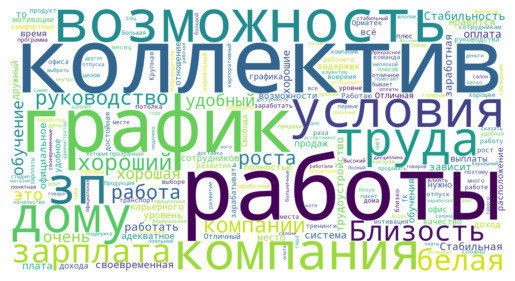

In [65]:
# Пример использования функции
text_without_stop_words = remove_stop_words(text_without_stop_words)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text_without_stop_words)
word_cloud1

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()